In [98]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [99]:
clf = DecisionTreeClassifier(max_depth=3)
dataset = load_iris()
X, y = dataset.data, dataset.target
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [100]:
cross_val_score(clf, X, y, cv=10).mean() * 100

96.0

In [101]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [102]:
cm = confusion_matrix(y_pred, y_test)

<Axes: >

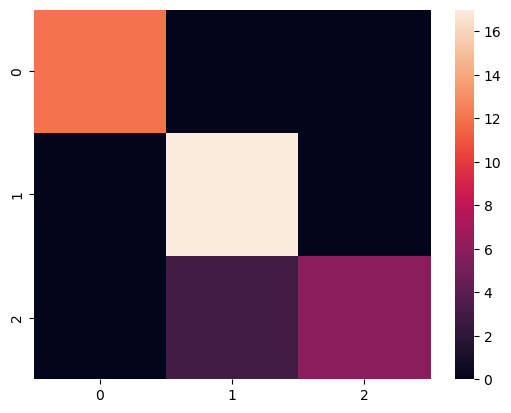

In [103]:
import seaborn as sns
sns.heatmap(cm)

In [104]:
import matplotlib.pyplot as plt

[Text(0.375, 0.875, 'x[3] <= 0.7\ngini = 0.659\nsamples = 112\nvalue = [38, 30, 44]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.85\ngini = 0.482\nsamples = 74\nvalue = [0, 30, 44]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.121\nsamples = 31\nvalue = [0, 29, 2]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.045\nsamples = 43\nvalue = [0, 1, 42]'),
 Text(0.625, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

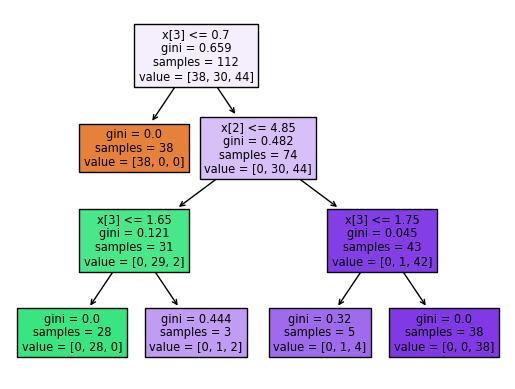

In [105]:
plot_tree(clf, filled=True)

In [106]:
# Before plotting, we will reduce the number of features for the convenience of plotting the points
pca = PCA(n_components=2)
x_test = pca.fit_transform(x_test)

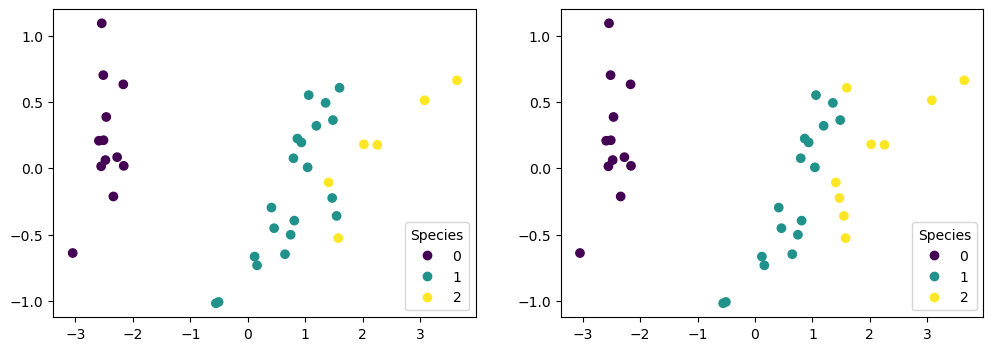

In [107]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
true = ax[0].scatter(x_test[:, 0], x_test[:, 1], c=y_test, label='True')

ax[0].legend(*true.legend_elements(), title='Species')

pred = ax[1].scatter(x_test[:, 0], x_test[:, 1], c=y_pred, label='Prediction')

ax[1].legend(*pred.legend_elements(), title='Species')

In [59]:
dataset.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =